# Univariate analysis of the Elbe dataset

In [1]:
library(ggplot2)
library(dplyr)
library(data.table)
library(ismev)
library(evd)
library(extRemes)
library(lubridate)
library(GGally)
library(maxstablePCA)
library(evmix)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.

Loading required package: Lmoments

Loading required package: distillery


Attaching package: ‘extRemes’


The following object is masked from ‘package:evd’:

    mrlplot


The following objects are masked from ‘package:stats’:

    qqnorm, qqplot



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are

### Preprocessing and declustering

In [2]:
data(elbe)
dat <- elbe$train$raw
summer_blockmax_dat <- elbe$train$blockmax
summer_blockmax_dat_test <- elbe$test$blockmax

train <- elbe$train$raw 
test <- elbe$test$raw

train$date <- as.Date(train$date)
test$date <- as.Date(test$date)

train_summer <-  train %>% filter(month(date) >= 6, month(date) <= 9)
test_summer <-  test%>% filter(month(date) >= 6, month(date) <= 9)

train_summer_declustered <- train_summer %>% 
group_by(year(date), month(date), day(date) > 15) %>% 
summarize_all(max) %>% 
na.omit()

test_summer_declustered <- test_summer %>% 
group_by(year(date), month(date), day(date) > 15) %>% 
summarize_all(max) %>% 
na.omit()

In [3]:
dat <- train_summer_declustered
summary(dat)

   year(date)    month(date)   day(date) > 15       date           
 Min.   :1993   Min.   :6.00   Mode :logical   Min.   :1993-06-15  
 1st Qu.:1997   1st Qu.:6.75   FALSE:60        1st Qu.:1997-09-11  
 Median :2001   Median :7.50   TRUE :60        Median :2001-08-07  
 Mean   :2001   Mean   :7.50                   Mean   :2001-08-31  
 3rd Qu.:2005   3rd Qu.:8.25                   3rd Qu.:2005-07-03  
 Max.   :2010   Max.   :9.00                   Max.   :2010-09-30  
      Aken          Bad_Dueben          Calbe           Dresden      
 Min.   : 148.0   Min.   :  16.10   Min.   : 41.10   Min.   : 119.0  
 1st Qu.: 210.8   1st Qu.:  34.65   1st Qu.: 62.88   1st Qu.: 170.0  
 Median : 270.0   Median :  51.55   Median : 75.80   Median : 216.0  
 Mean   : 413.2   Mean   : 100.96   Mean   : 98.56   Mean   : 375.9  
 3rd Qu.: 414.8   3rd Qu.:  88.03   3rd Qu.:107.25   3rd Qu.: 339.5  
 Max.   :3960.0   Max.   :2010.00   Max.   :319.00   Max.   :4500.0  
 Havelberg_Stadt      Loeben      

In [4]:
dim(dat)

[1] 120  17

### Fitting GEV's to every marginal 

In [5]:
fitdat <- data.frame(
    station = NA,
    loc = NA, 
    scale = NA, 
    shape = NA,
    sdloc = NA, 
    sdscale = NA,
    sdshape = NA 
    #converged = NA
)
datmat <- as.matrix(dat[, 5:17])

for(i in 1:13) {
    fitstat <- gev.fit(datmat[,i])
    #fitstat2 <- evd::fgev(datmat[,i])
        
    estparams <- as.vector(fitstat$mle)
    estsd <- as.vector(fitstat$se)
    
    
    
    tmp <- data.frame(
        station = names(summer_blockmax_dat)[i+2],
        loc = estparams[1], 
        scale = estparams[2],
        shape = estparams[3], 
        sdloc = estsd[1], 
        sdscale = estsd[2],
        sdshape = estsd[3]
    )
    
    # print(tmp)
    
    fitdat <- full_join(fitdat, tmp)
}

fitdat <- na.omit(fitdat)

$conv
[1] 0

$nllh
[1] 776.3797

$mle
[1] 234.4150998  88.2184278   0.7320754

$se
[1]  9.3459454 10.4266282  0.1097536



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 621.3659

$mle
[1] 41.9877896 24.6241420  0.6806264

$se
[1] 2.52241136 2.75858115 0.09352403



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 597.692

$mle
[1] 69.4622639 22.9409901  0.4690726

$se
[1] 2.37652381 2.24557911 0.08685223



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 760.9135

$mle
[1] 185.7990689  73.3211597   0.8202816

$se
[1] 7.6307626 9.0850234 0.1085227



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 596.9411

$mle
[1] 53.65592313 28.54705754  0.07439026

$se
[1] 3.03674741 2.31905946 0.08423231



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 395.0682

$mle
[1] 6.5882232 3.8638235 0.6187496

$se
[1] 0.3957229 0.4140875 0.0903231



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 788.169

$mle
[1] 305.6186888 101.0727460   0.6478241

$se
[1] 10.34897251 11.10335704  0.09155086



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 818.8368

$mle
[1] 395.7112037 151.4199159   0.3878217

$se
[1] 15.50794265 13.85784088  0.07779347



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 760.6706

$mle
[1] 179.3900930  76.0379265   0.7372319

$se
[1] 7.74295849 8.83714304 0.09454214



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 795.193

$mle
[1] 315.3164131 112.3921192   0.5658386

$se
[1] 11.5427497 11.6863975  0.0879129



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 757.0111

$mle
[1] 188.4548569  69.6447921   0.8443092

$se
[1] 7.07173051 8.69329357 0.09952326



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 759.24

$mle
[1] 196.9367589  71.5573821   0.8468251

$se
[1] 7.497105 9.050724 0.112734



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


$conv
[1] 0

$nllh
[1] 810.6653

$mle
[1] 389.9647089 134.9286855   0.4699903

$se
[1] 13.85076662 13.10007870  0.08273549



Joining with `by = join_by(station, loc, scale, shape, sdloc, sdscale, sdshape)`


To investigate if the fits are reasonable, we provide QQ-plots, suggesting that the fits are generally okay. 

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Saving 7 x 7 in image


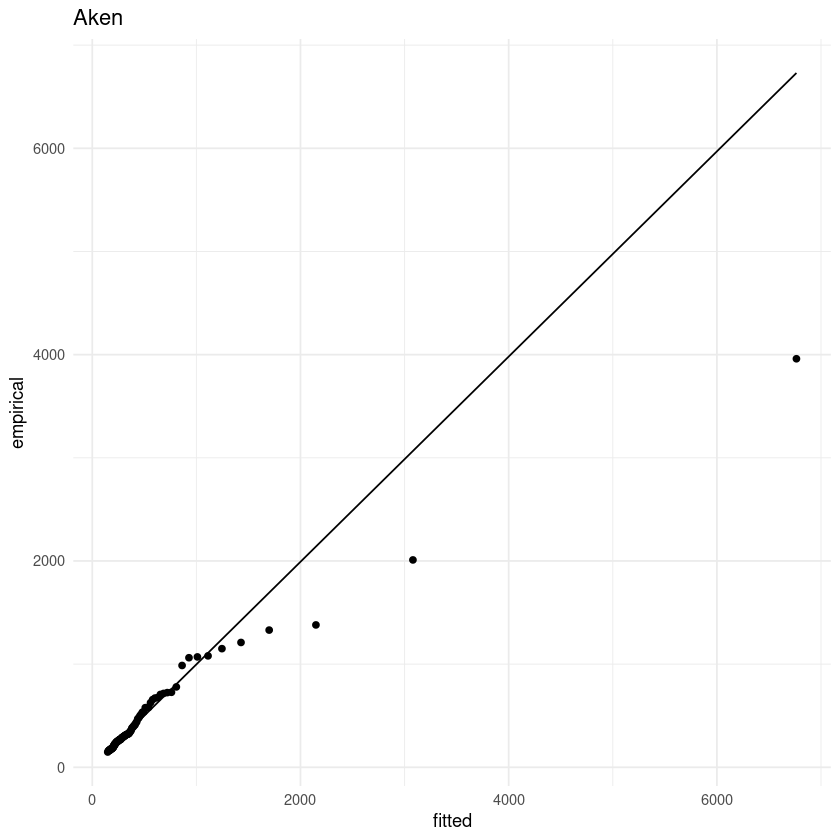

Saving 7 x 7 in image


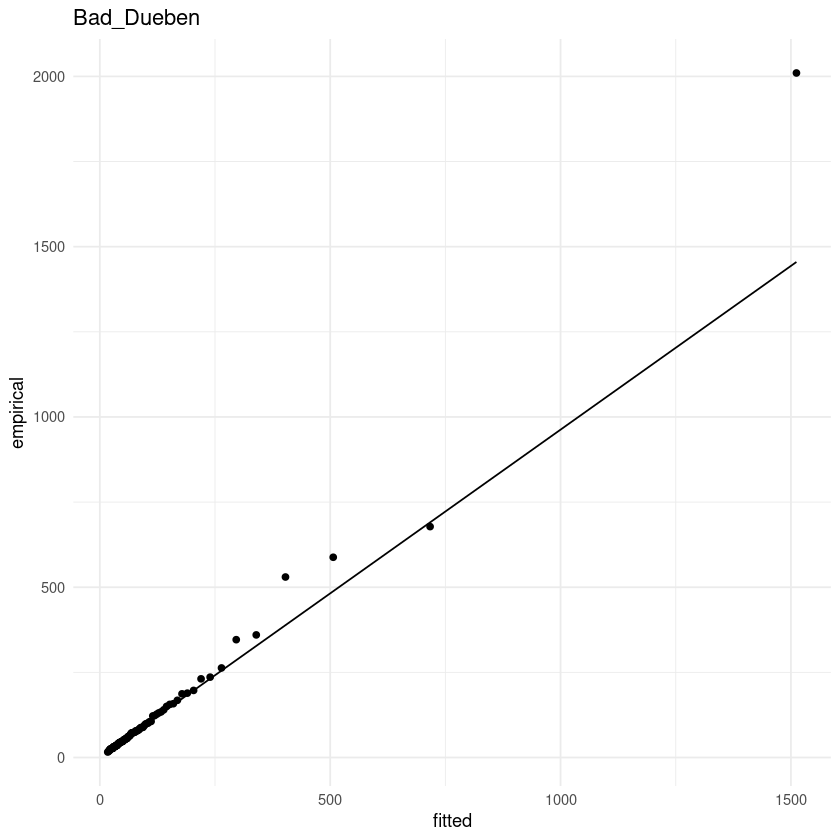

Saving 7 x 7 in image


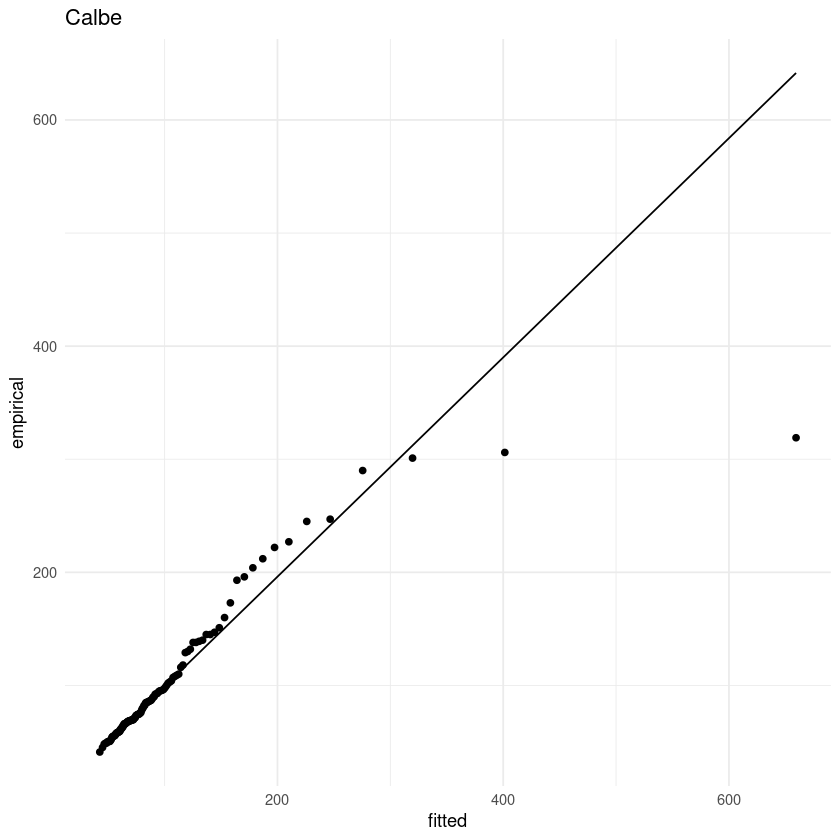

Saving 7 x 7 in image


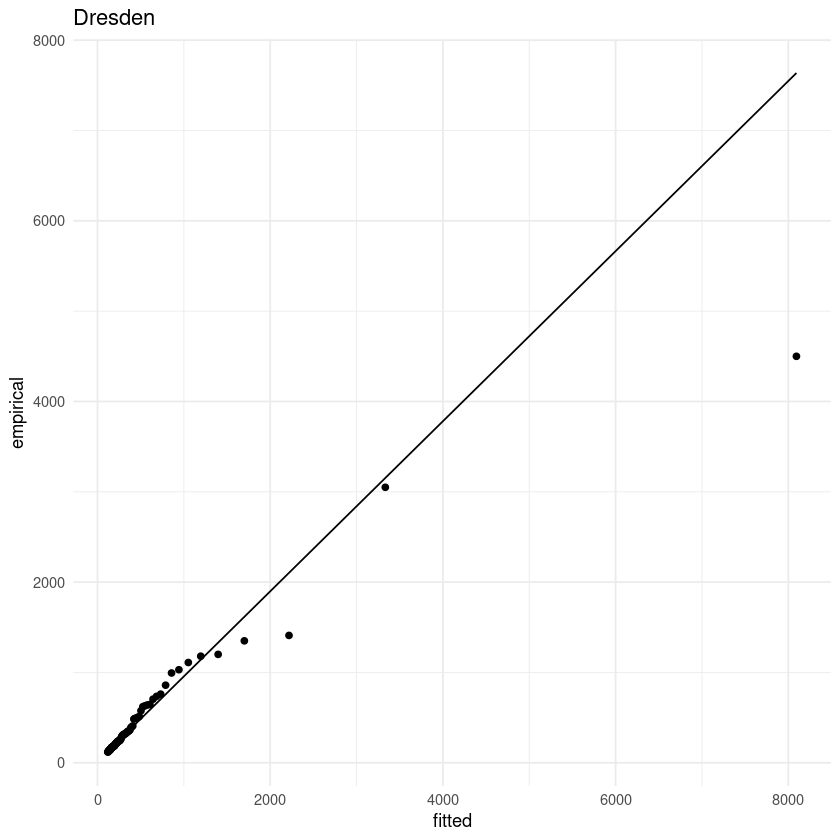

Saving 7 x 7 in image


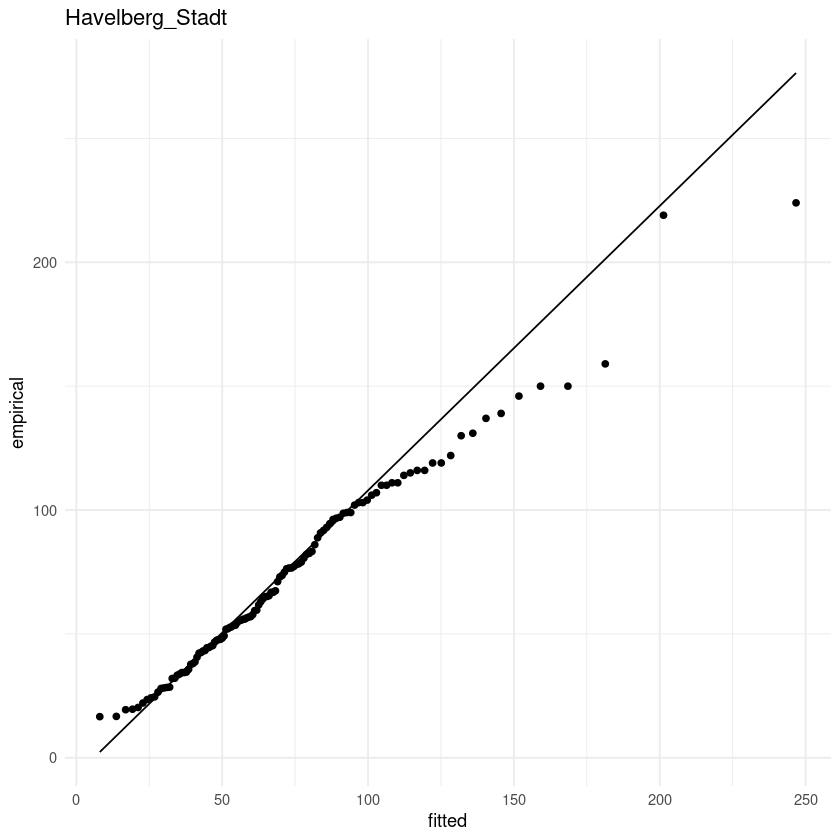

Saving 7 x 7 in image


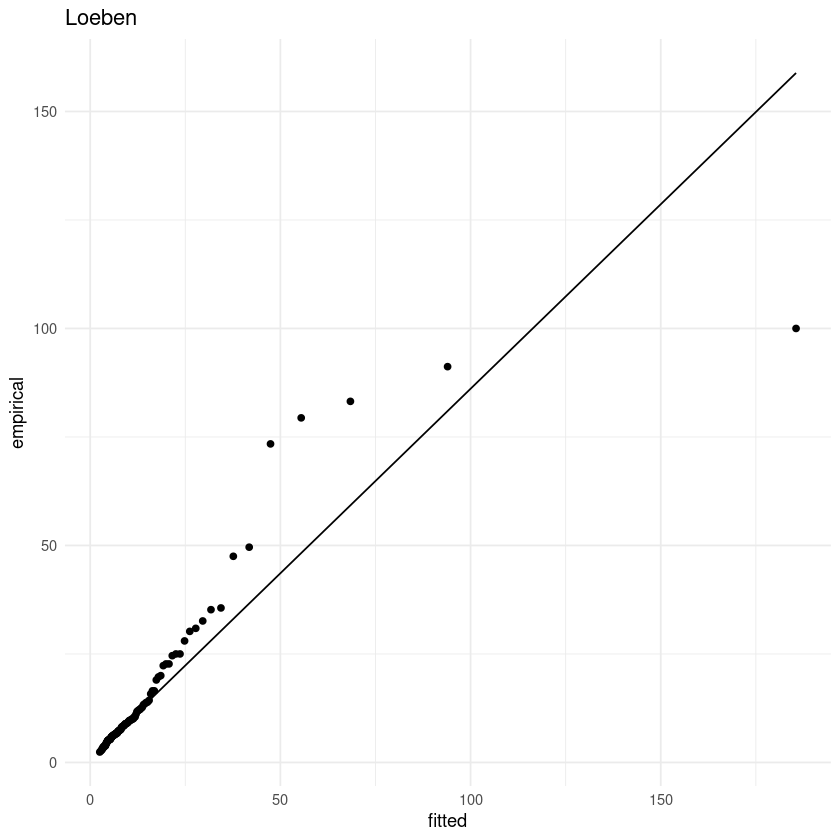

Saving 7 x 7 in image


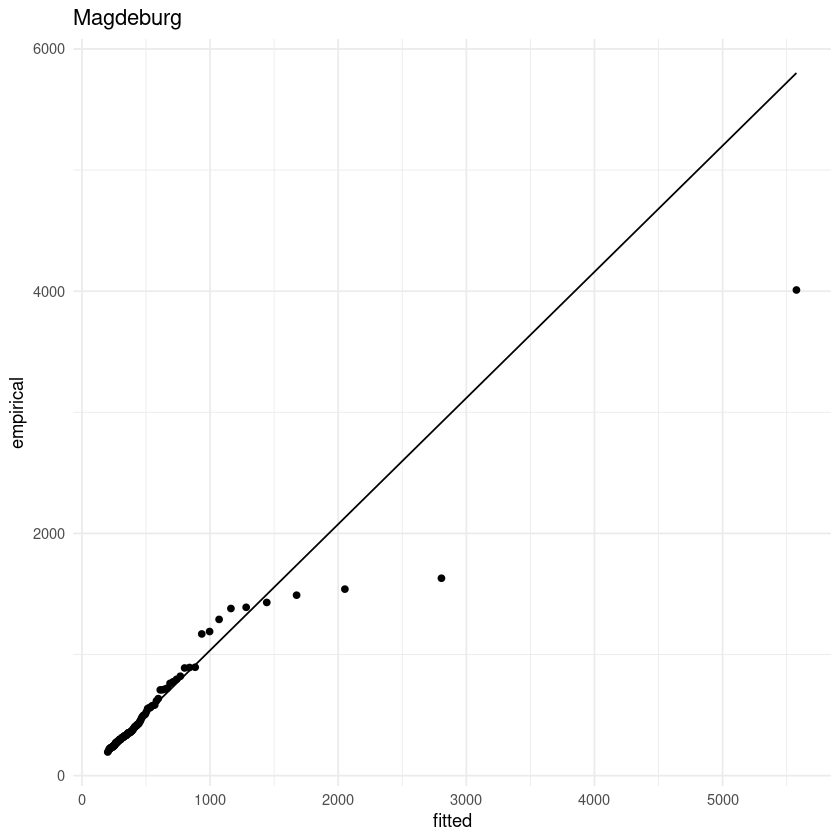

Saving 7 x 7 in image


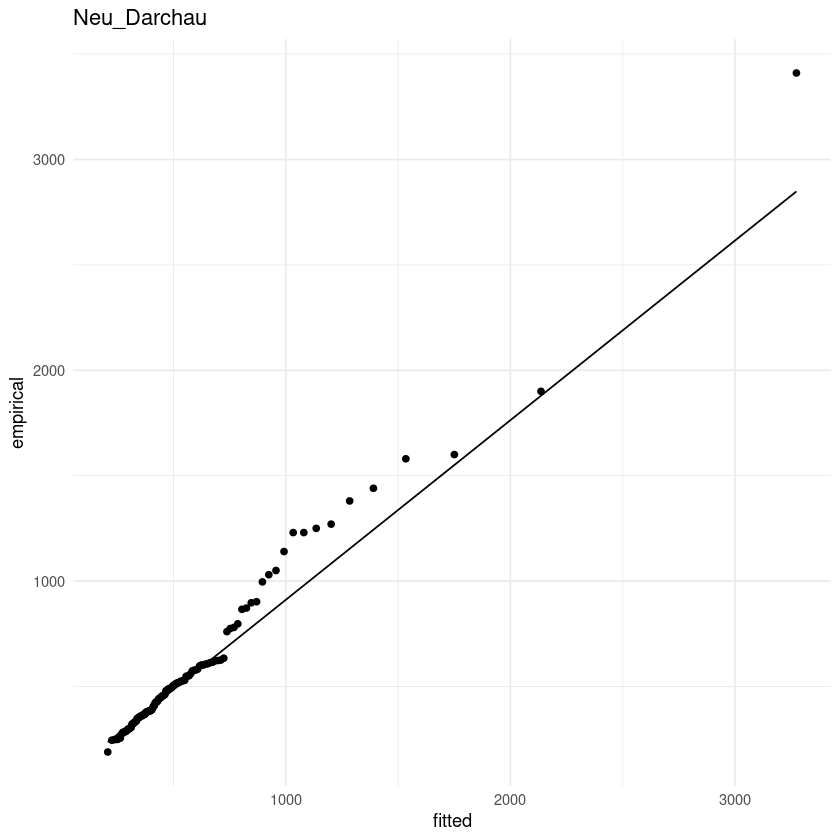

Saving 7 x 7 in image


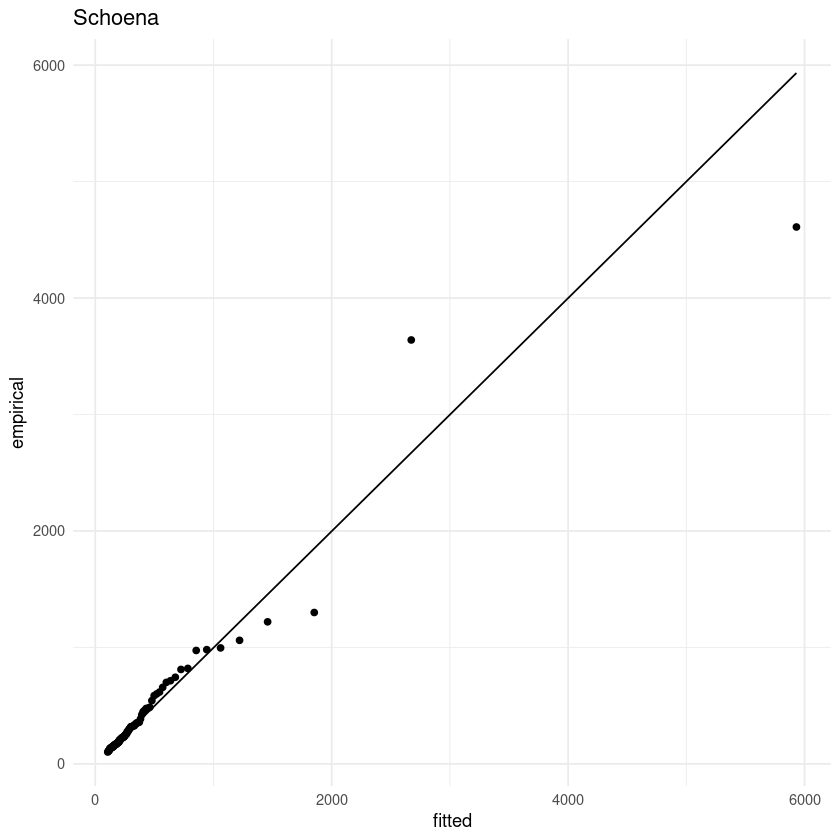

Saving 7 x 7 in image


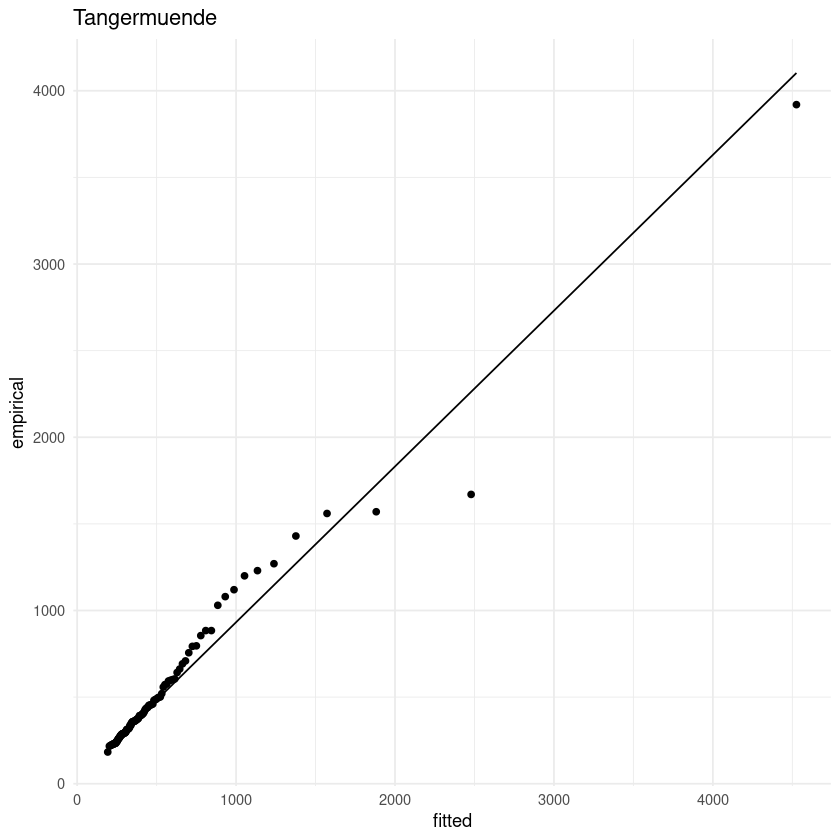

Saving 7 x 7 in image


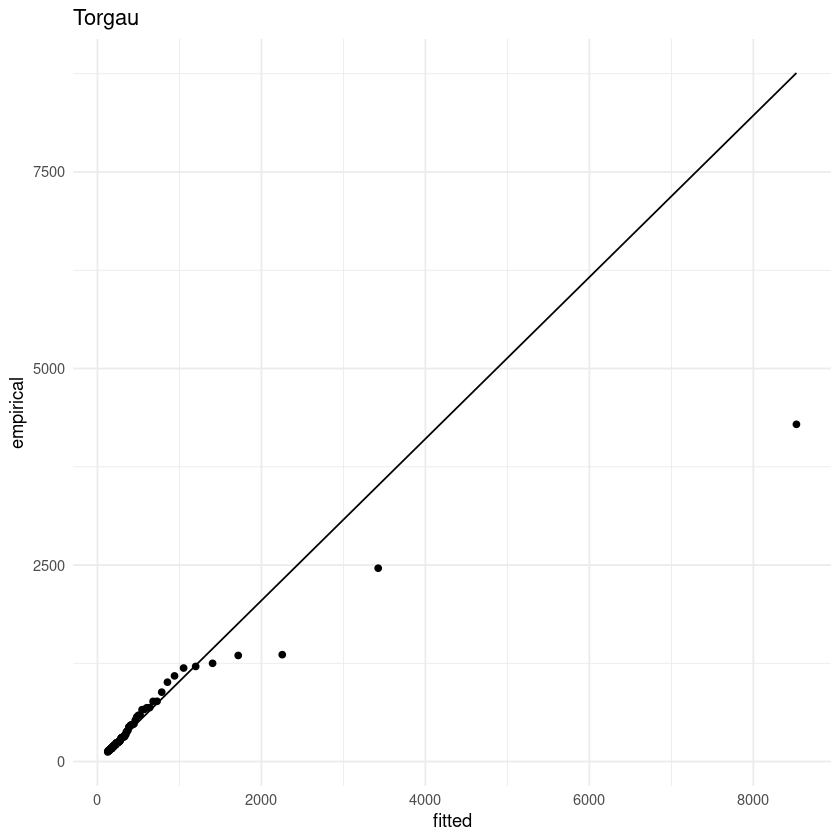

Saving 7 x 7 in image


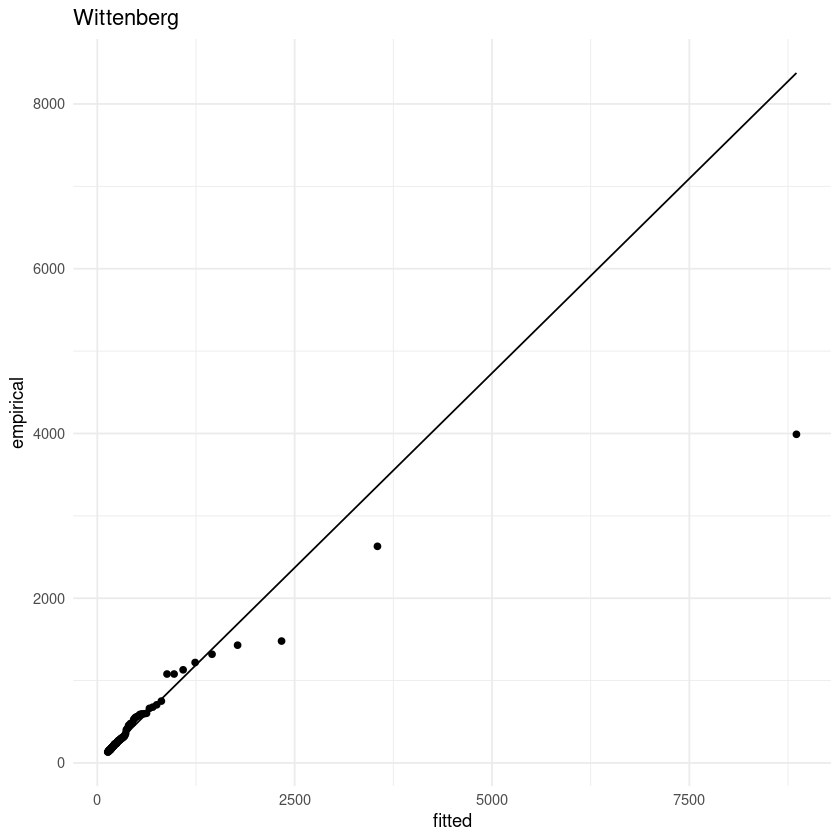

Saving 7 x 7 in image


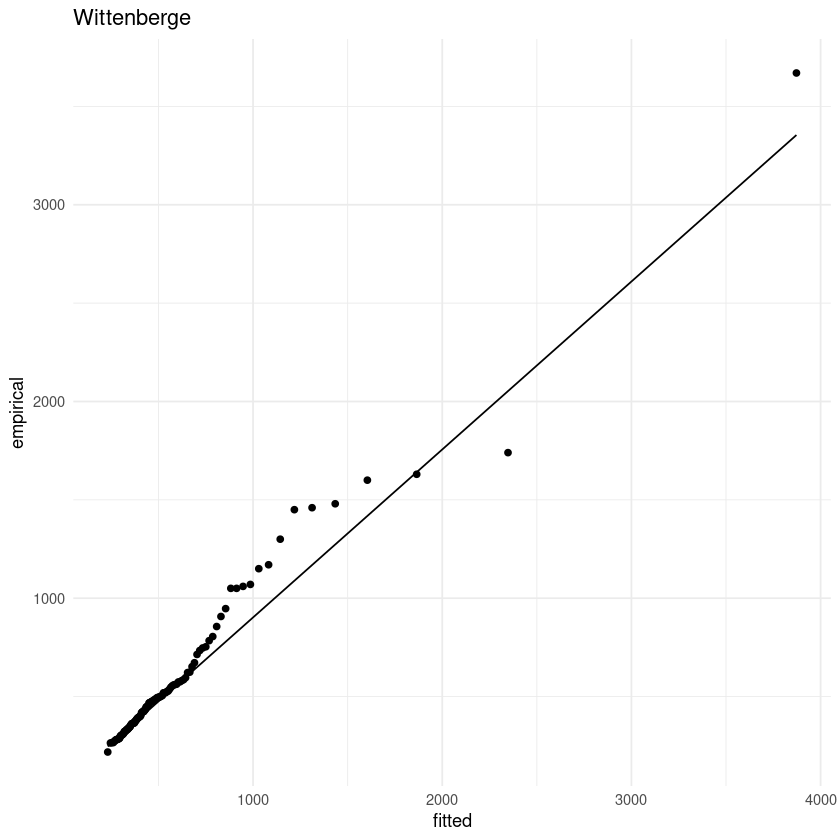

In [6]:
for(i in 1:13) {
    p <- ggplot(aes_string(sample = names(dat)[i+4]), data = dat) + 
    stat_qq(distribution = qgev, dparams = fitdat[i, 2:4]) + 
    stat_qq_line(distribution = qgev, dparams = fitdat[i, 2:4]) + 
    ggtitle(names(dat)[i+4]) + 
    xlab("fitted") + 
    ylab("empirical") +
    theme_minimal()

    
    print(p)
    ggsave(paste0("QQ_", names(summer_blockmax_dat)[i+2], ".png"), p)
}

In [7]:
fitdat

,station,loc,scale,shape,sdloc,sdscale,sdshape
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Aken,234.415100,88.218428,0.73207535,9.3459454,10.4266282,0.10975364
3,Bad_Dueben,41.987790,24.624142,0.68062635,2.5224114,2.7585811,0.09352403
4,Calbe,69.462264,22.940990,0.46907256,2.3765238,2.2455791,0.08685223
5,Dresden,185.799069,73.321160,0.82028159,7.6307626,9.0850234,0.10852269
6,Havelberg_Stadt,53.655923,28.547058,0.07439026,3.0367474,2.3190595,0.08423231
7,Loeben,6.588223,3.863823,0.61874956,0.3957229,0.4140875,0.09032310
8,Magdeburg,305.618689,101.072746,0.64782411,10.3489725,11.1033570,0.09155086
9,Neu_Darchau,395.711204,151.419916,0.38782167,15.5079427,13.8578409,0.07779347
10,Schoena,179.390093,76.037927,0.73723194,7.7429585,8.8371430,0.09454214


Observe that for some stations, the variance might not exist, see for Example Dresden, Schöna and Wittbenberg. 

In [8]:
fitdat[, 1:4]

,station,loc,scale,shape
,<chr>,<dbl>,<dbl>,<dbl>
2,Aken,234.415100,88.218428,0.73207535
3,Bad_Dueben,41.987790,24.624142,0.68062635
4,Calbe,69.462264,22.940990,0.46907256
5,Dresden,185.799069,73.321160,0.82028159
6,Havelberg_Stadt,53.655923,28.547058,0.07439026
7,Loeben,6.588223,3.863823,0.61874956
8,Magdeburg,305.618689,101.072746,0.64782411
9,Neu_Darchau,395.711204,151.419916,0.38782167
10,Schoena,179.390093,76.037927,0.73723194


To further support this, we provide Hillplots for every marginal

Saving 7 x 7 in image


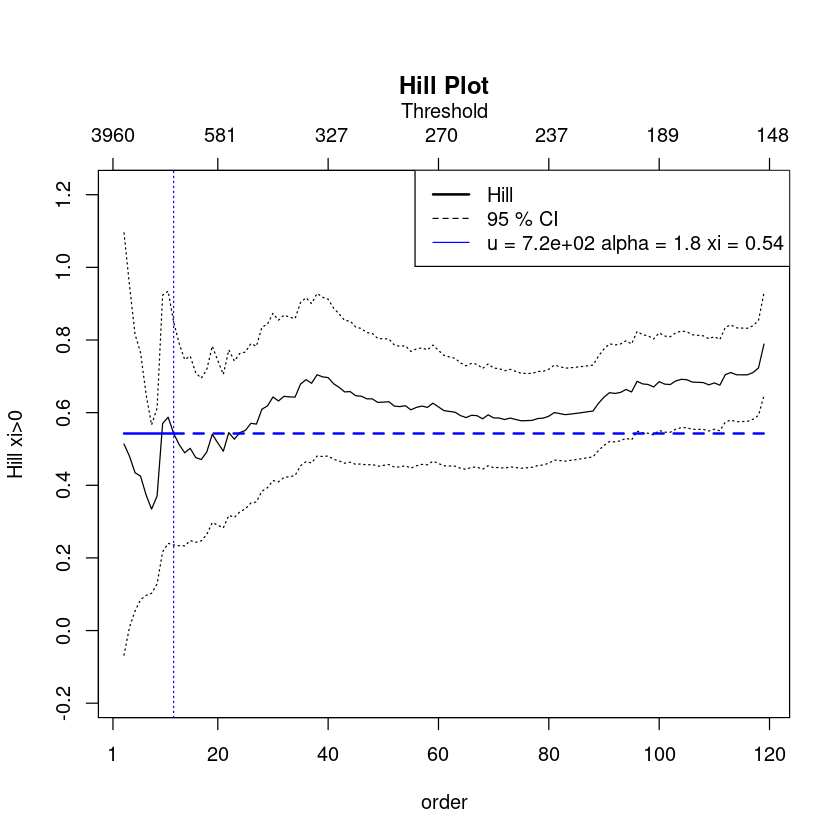

Saving 7 x 7 in image


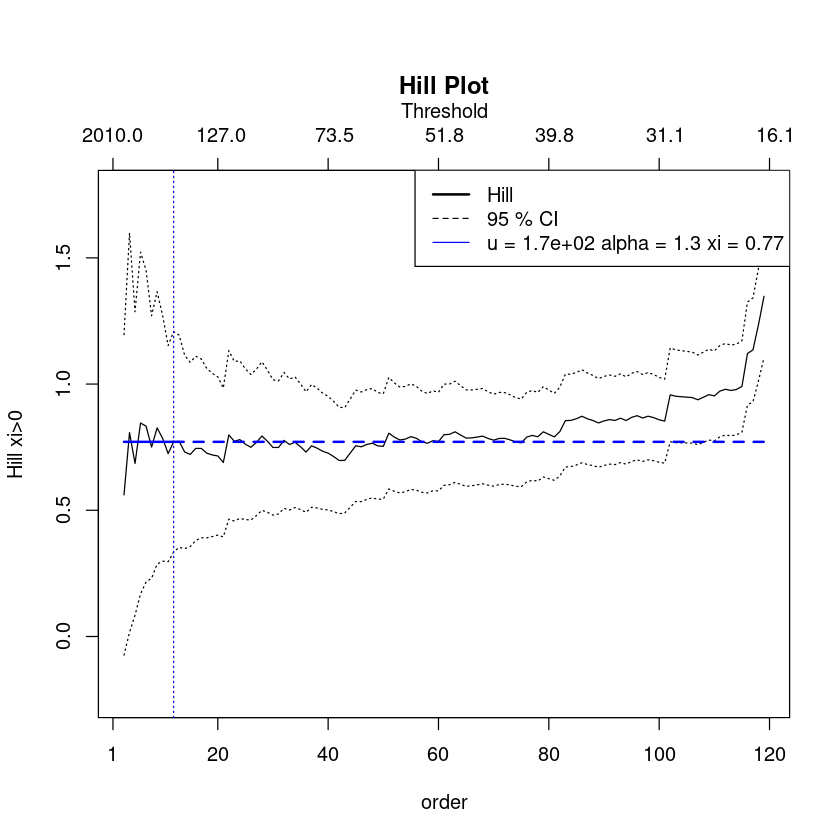

Saving 7 x 7 in image


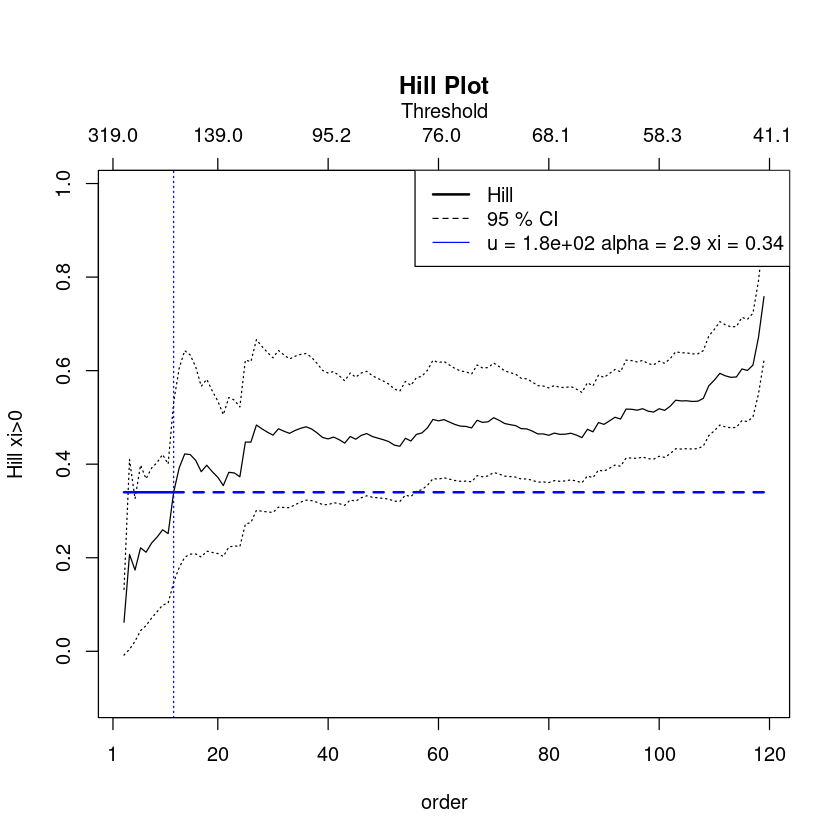

Saving 7 x 7 in image


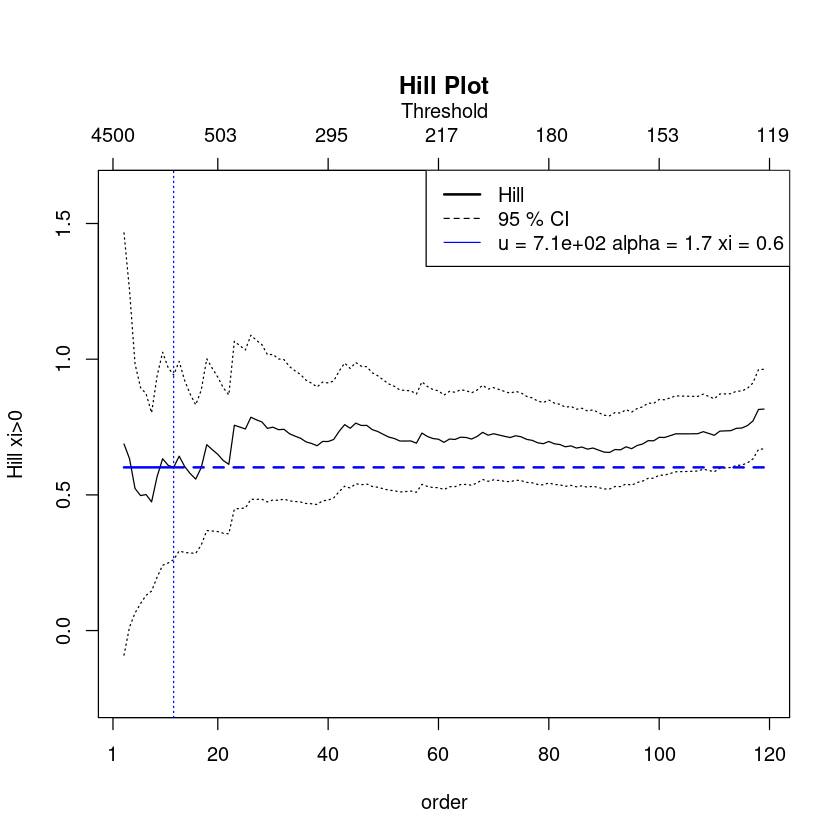

Saving 7 x 7 in image


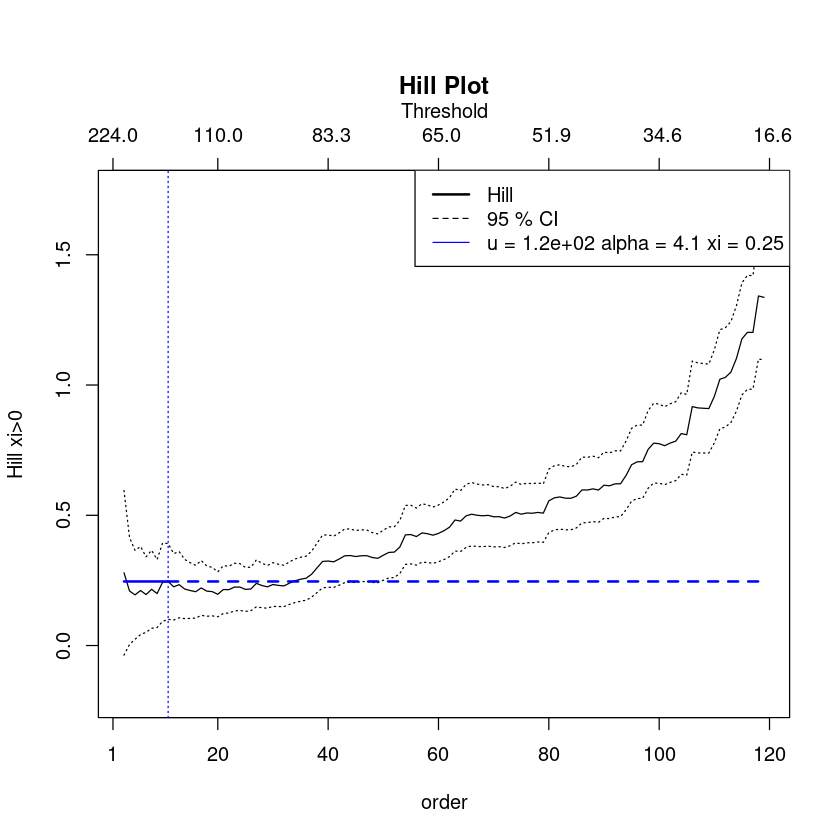

Saving 7 x 7 in image


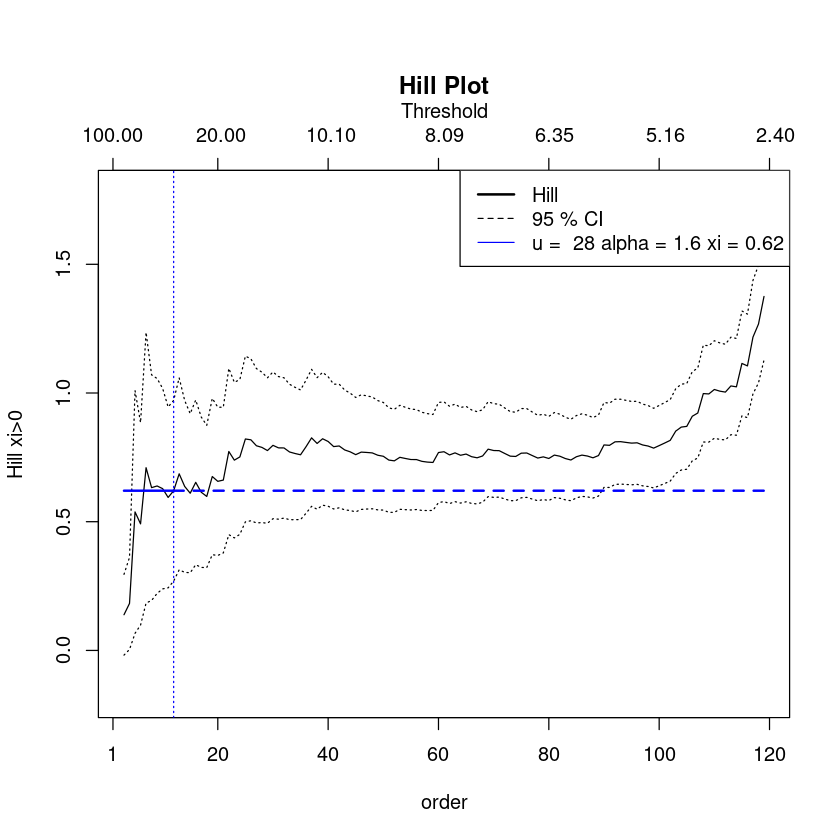

Saving 7 x 7 in image


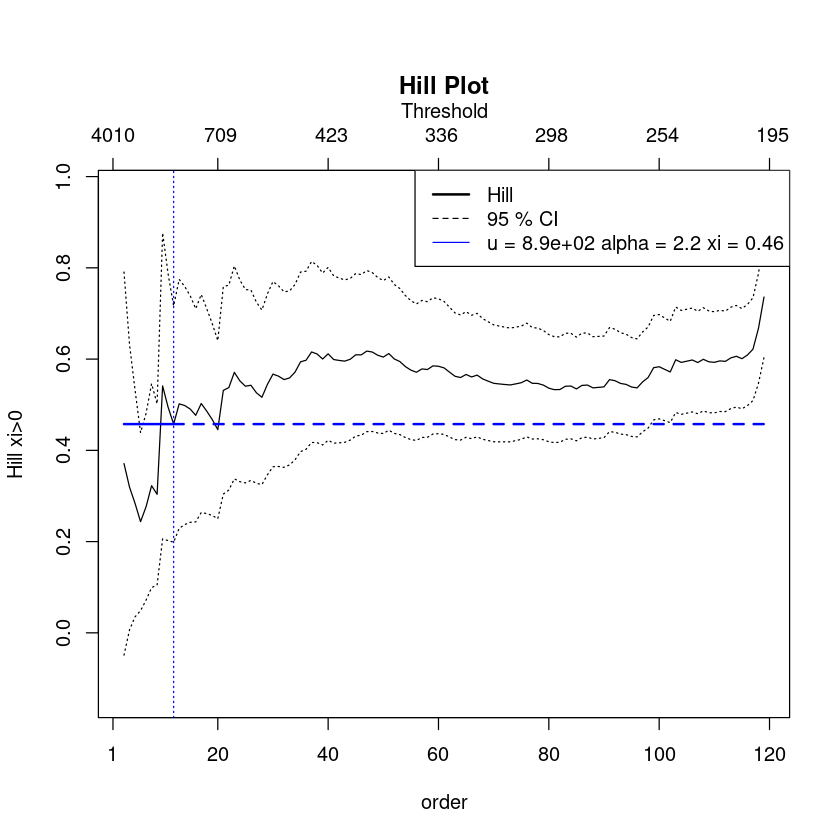

Saving 7 x 7 in image


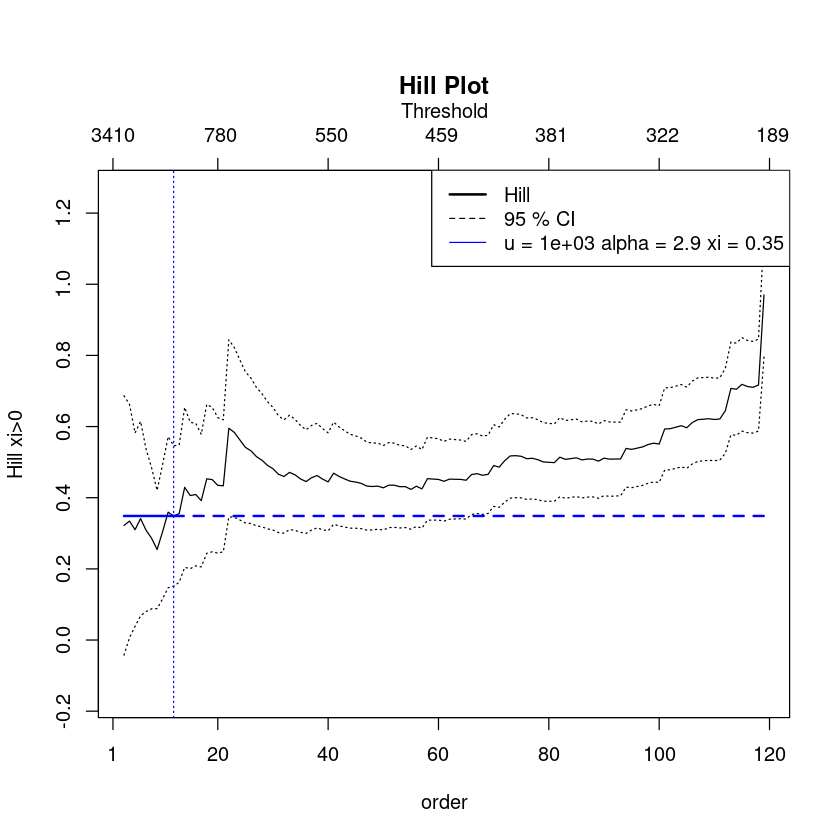

Saving 7 x 7 in image


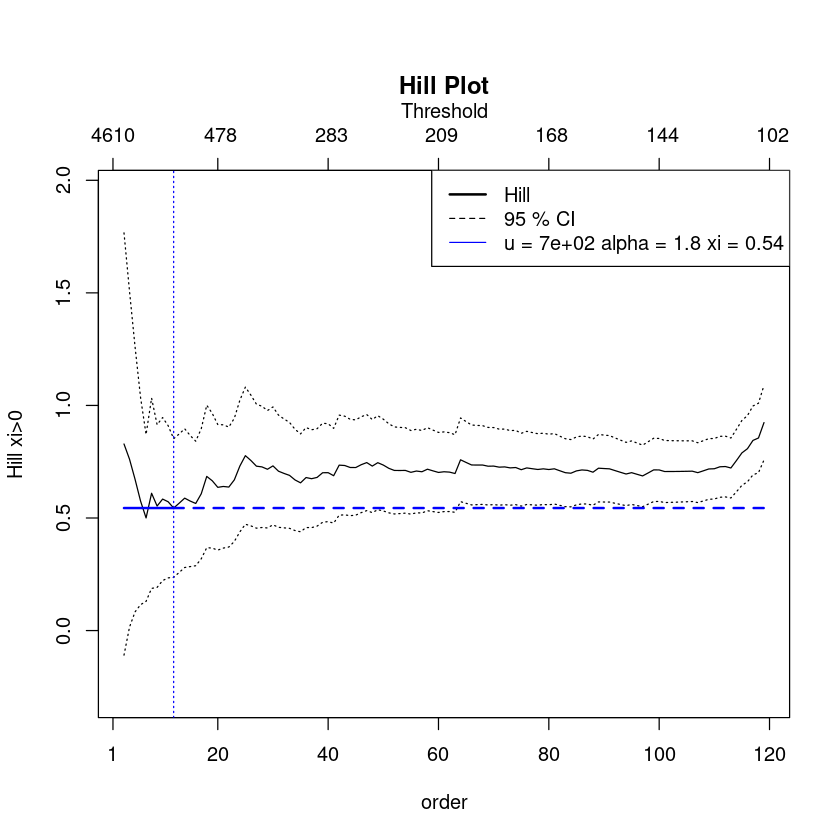

Saving 7 x 7 in image


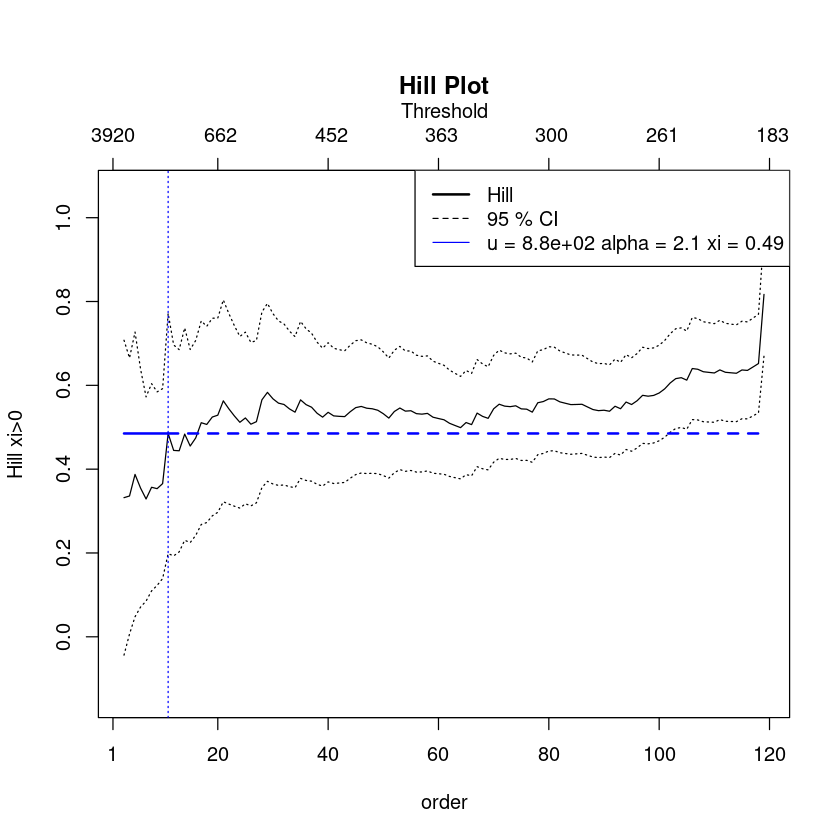

Saving 7 x 7 in image


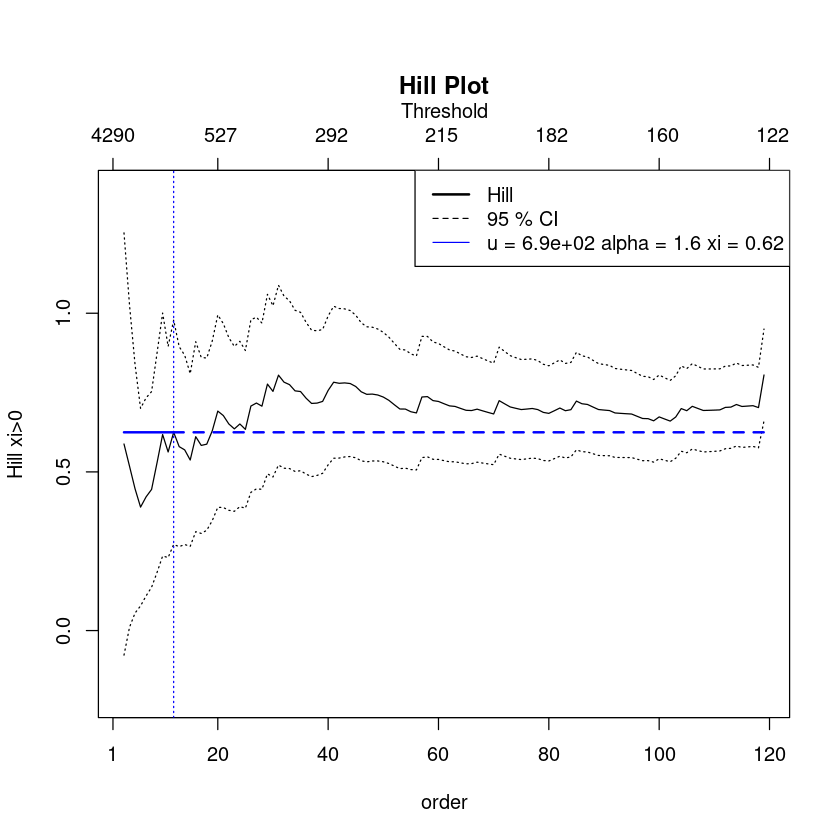

Saving 7 x 7 in image


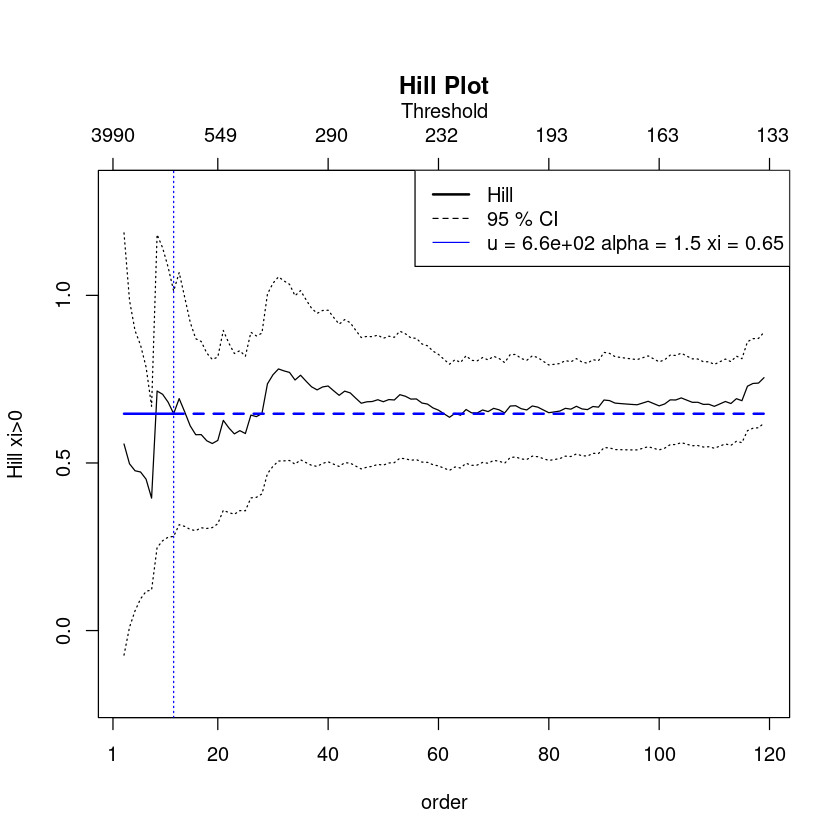

Saving 7 x 7 in image


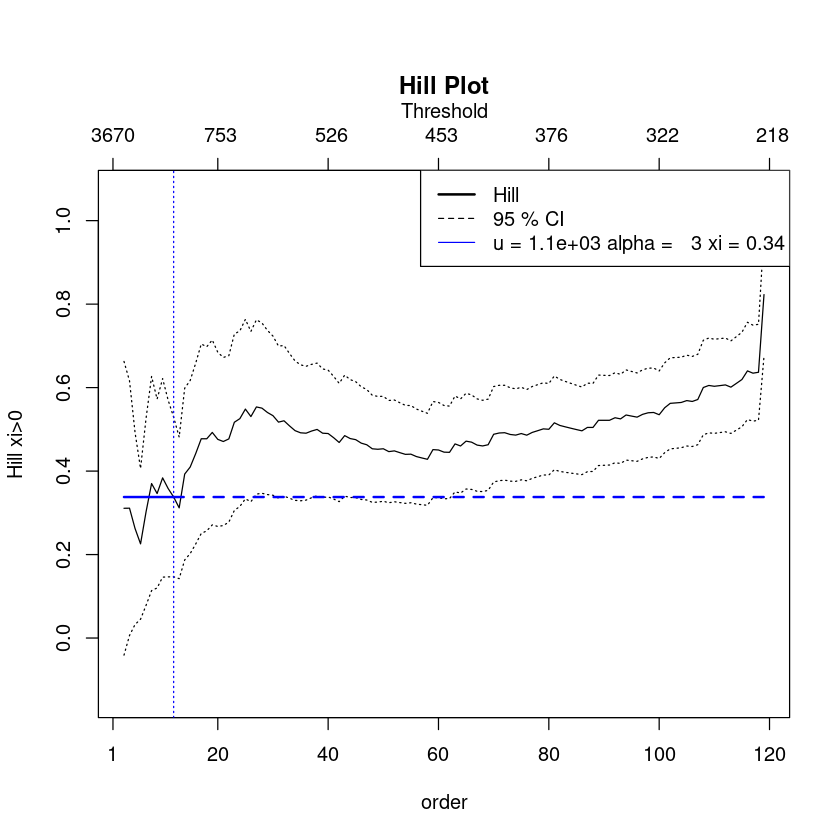

In [9]:
for(i in 1:13) {
    hillplotdat <- evmix::hillplot(datmat[,i])
    plotdat <- data.frame(
        k = hillplotdat$ks, 
        xi = hillplotdat$H,
        xi_upper = hillplotdat$ciu.H,
        xi_lower = hillplotdat$cil.H
    )
    p <- ggplot(aes(x = k, y = xi), data = plotdat) + 
    geom_line() + 
    geom_line(aes(x = k, y = xi_lower), linetype = "dashed") + 
    geom_line(aes(x = k, y = xi_upper), linetype = "dashed") + 
    ggtitle(paste("Hill-plot with 95% CI for", names(train_summer_declustered)[i+4])) +
    theme_minimal()
    ggsave(paste0("hill_", names(train_summer_declustered)[i+4], ".png"))
}

In [10]:
hillplotdat

data..n.,ks,H,se.H,cil.H,ciu.H
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
3670,1,0.7463065,0.74630655,-0.716427408,2.2090405
1740,2,0.4384584,0.31003689,-0.169202763,1.0461195
1630,3,0.3108820,0.17948779,-0.040907632,0.6626716
1600,4,0.3111230,0.15556151,0.006228063,0.6160180
1480,5,0.2625041,0.11739539,0.032413335,0.4925948
1460,6,0.2256263,0.09211154,0.045090970,0.4061616
1450,7,0.3025932,0.11436949,0.078433149,0.5267533
1300,8,0.3701296,0.13086057,0.113647585,0.6266116
1170,9,0.3462459,0.11541530,0.120036066,0.5724557


In [11]:
elbe$info

name,lat,lon,river,next_downstream
<chr>,<dbl>,<dbl>,<chr>,<chr>
Aken,51.8582,12.0522,Elbe,Magdeburg
Bad_Dueben,51.5906,12.5805,Mulde,Aken
Calbe,51.8958,11.7854,Saale,Magdeburg
Dresden,51.0559,13.7379,Elbe,Torgau
Havelberg_Stadt,52.8245,12.0804,Havel,Wittenberge
Loeben,51.7685,13.0827,schwarze Elster,Wittenberg
Magdeburg,52.1515,11.6700,Elbe,Tangermuende
Neu_Darchau,53.2347,10.8933,Elbe,
Schoena,50.8951,14.2245,Elbe,Dresden


### Investigate serial dependence using extremal index plots

The heuristic is, that a value close to one indicates that extreme events tend to not cluster, i.e. low values provide an argument against the i.i.d. assumption.

In this case, especially for the plots are usually somewhat close to one, so the i.i.d. assumption, while likely not true, is reasonable. 

Saving 7 x 7 in image


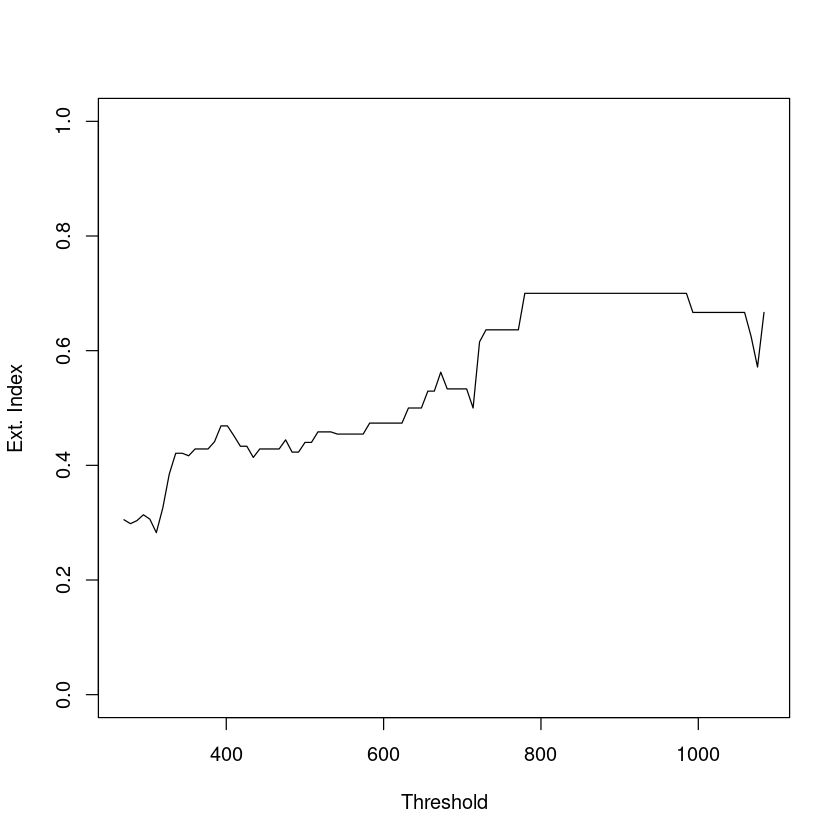

Saving 7 x 7 in image


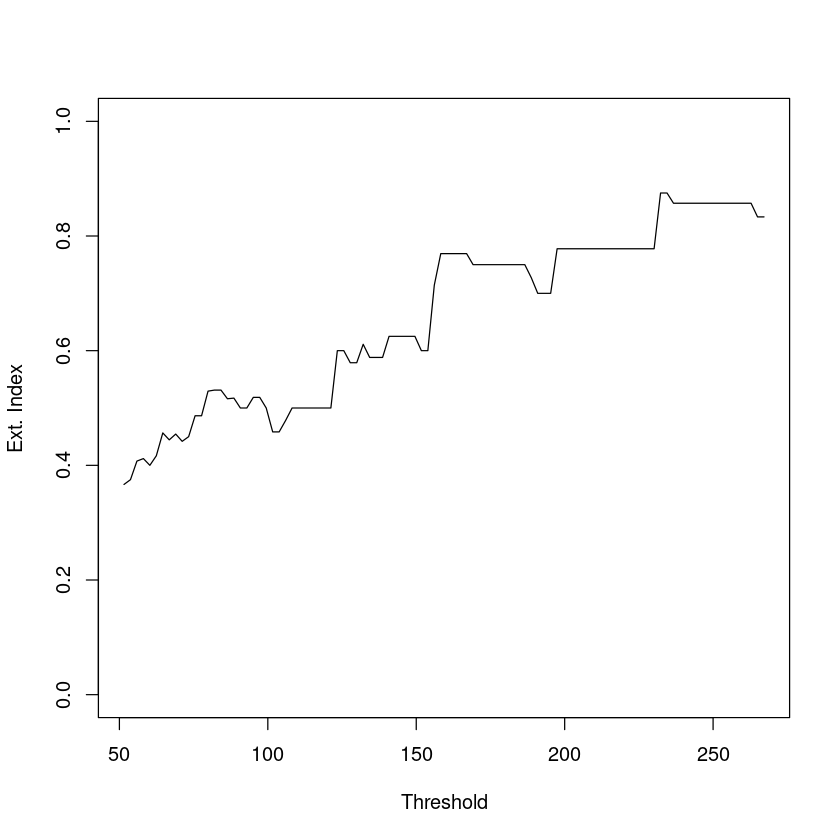

Saving 7 x 7 in image


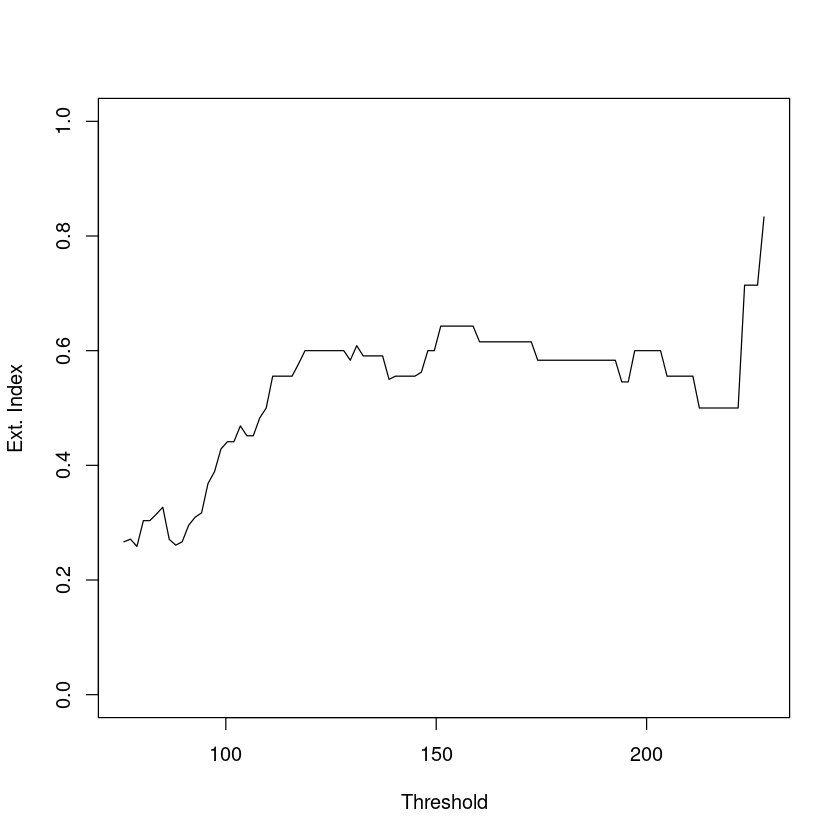

Saving 7 x 7 in image


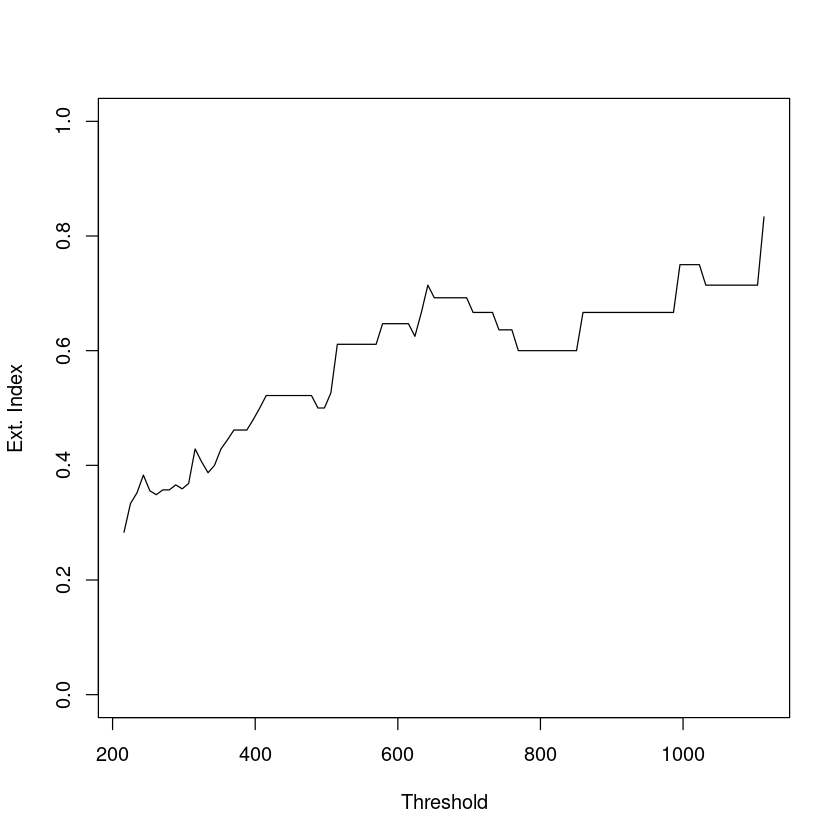

Saving 7 x 7 in image


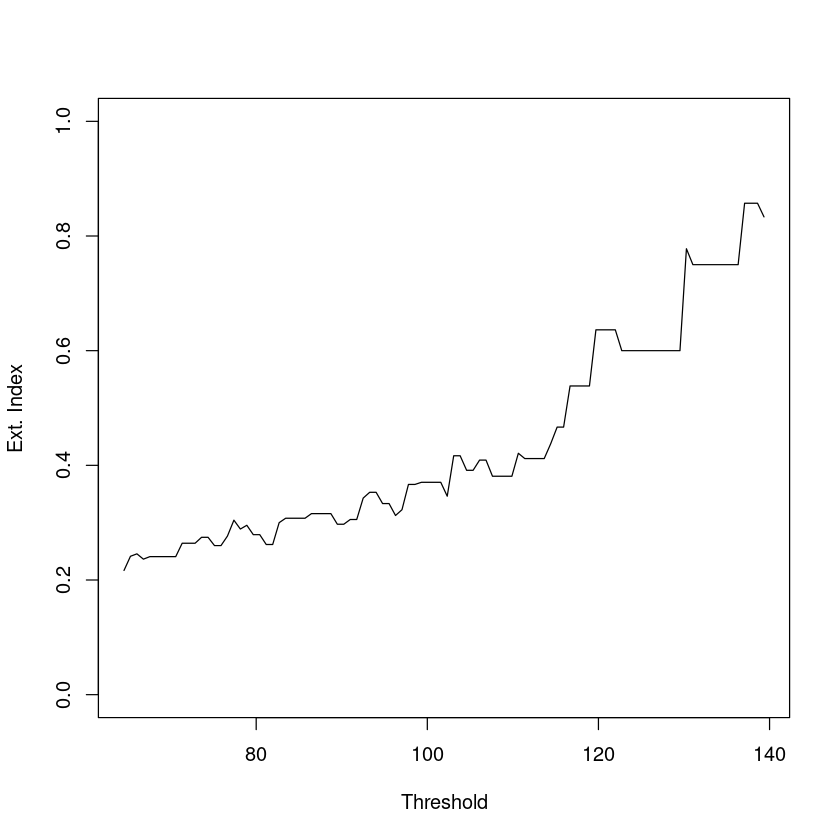

Saving 7 x 7 in image


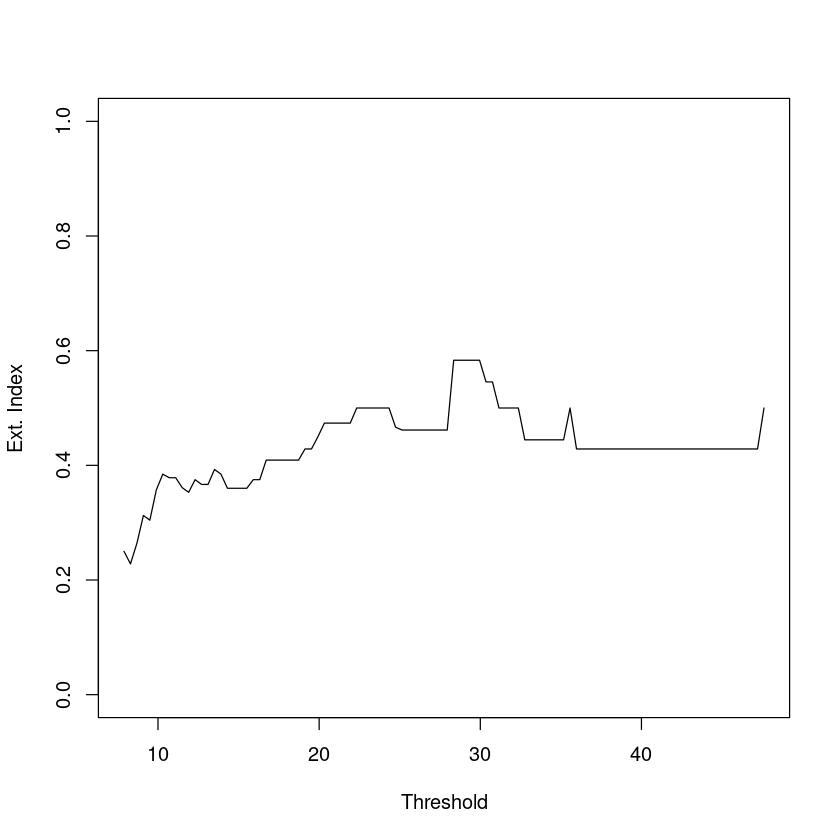

Saving 7 x 7 in image


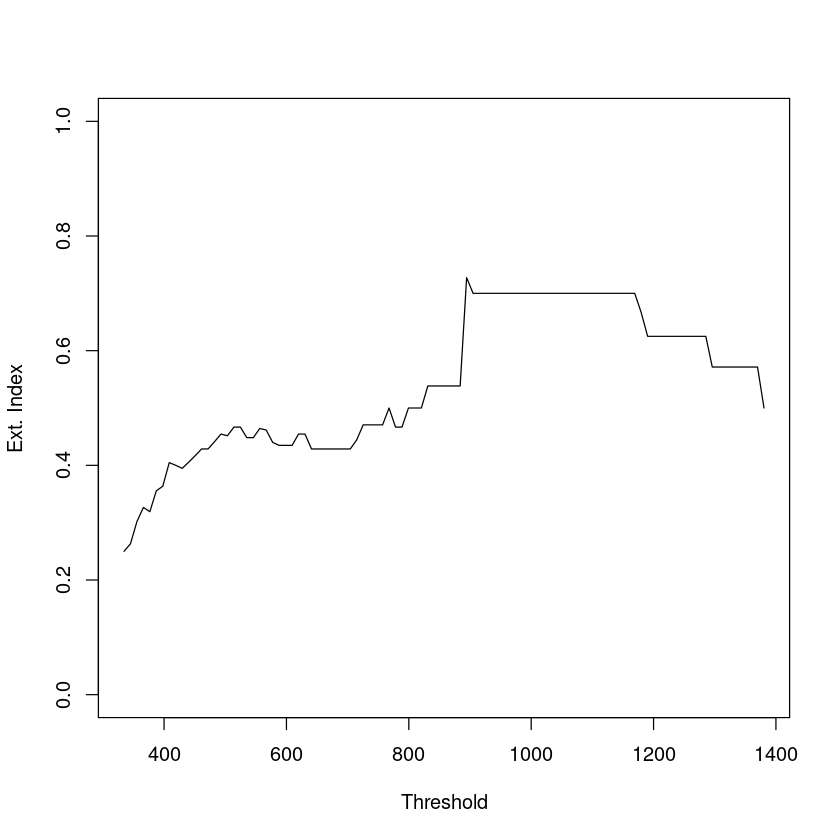

Saving 7 x 7 in image


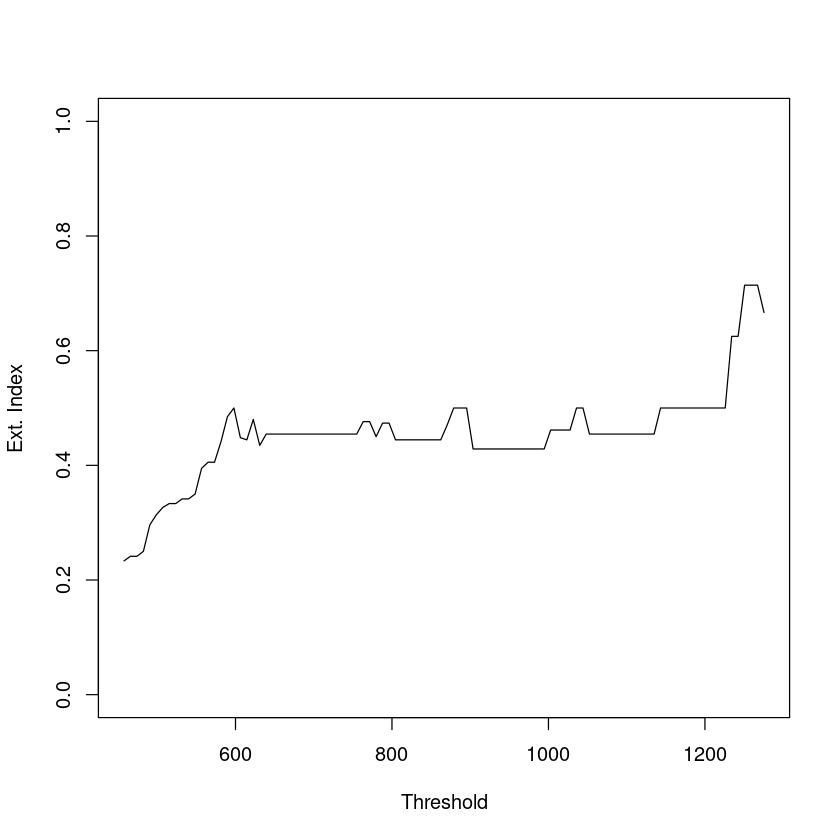

Saving 7 x 7 in image


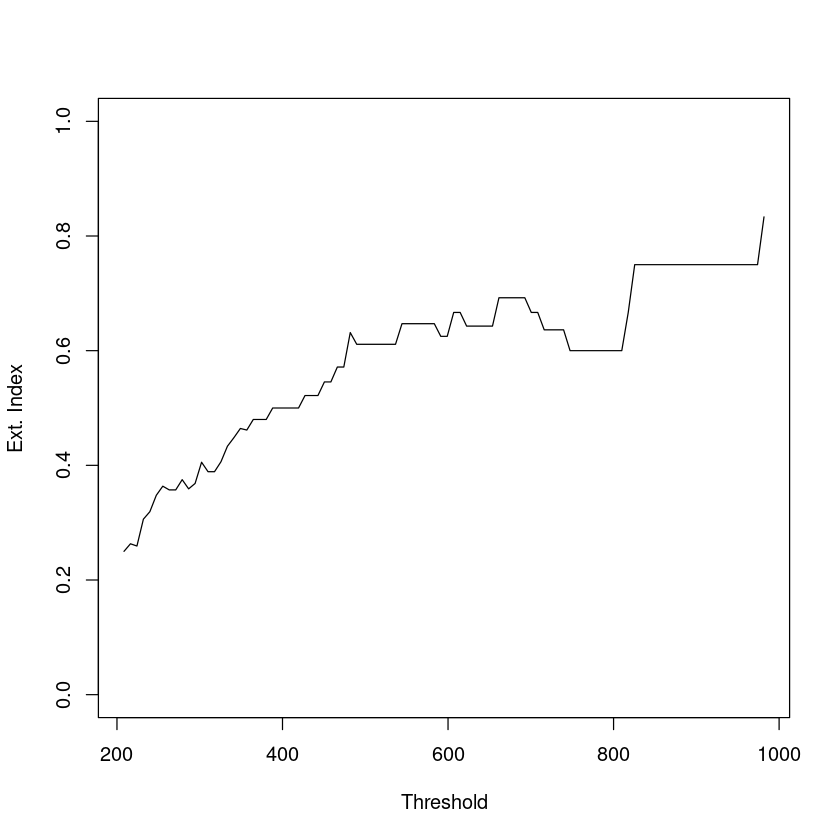

Saving 7 x 7 in image


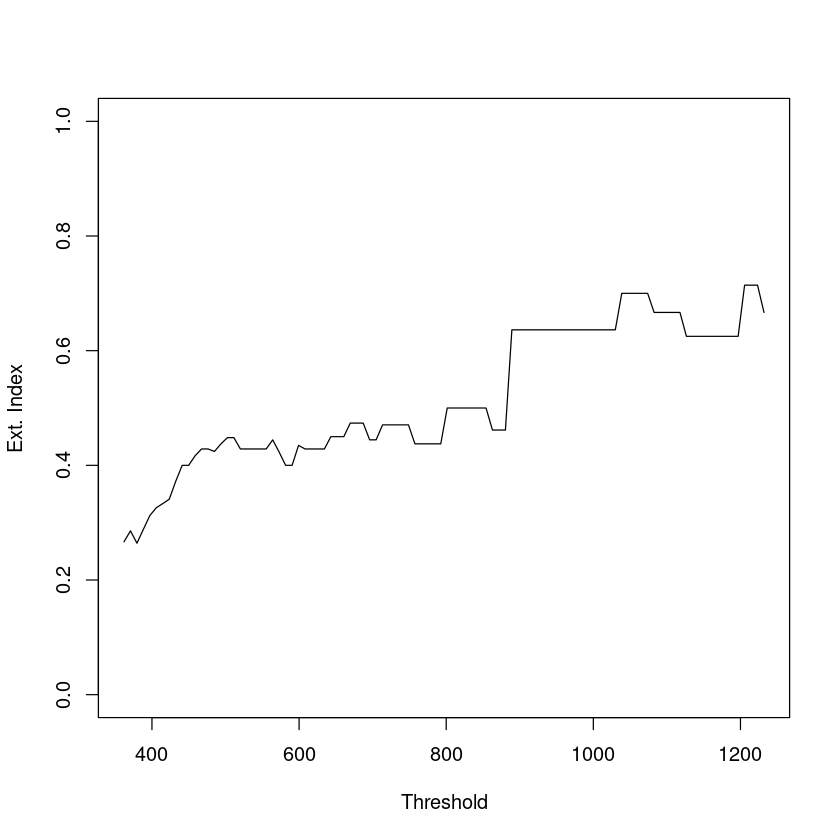

Saving 7 x 7 in image


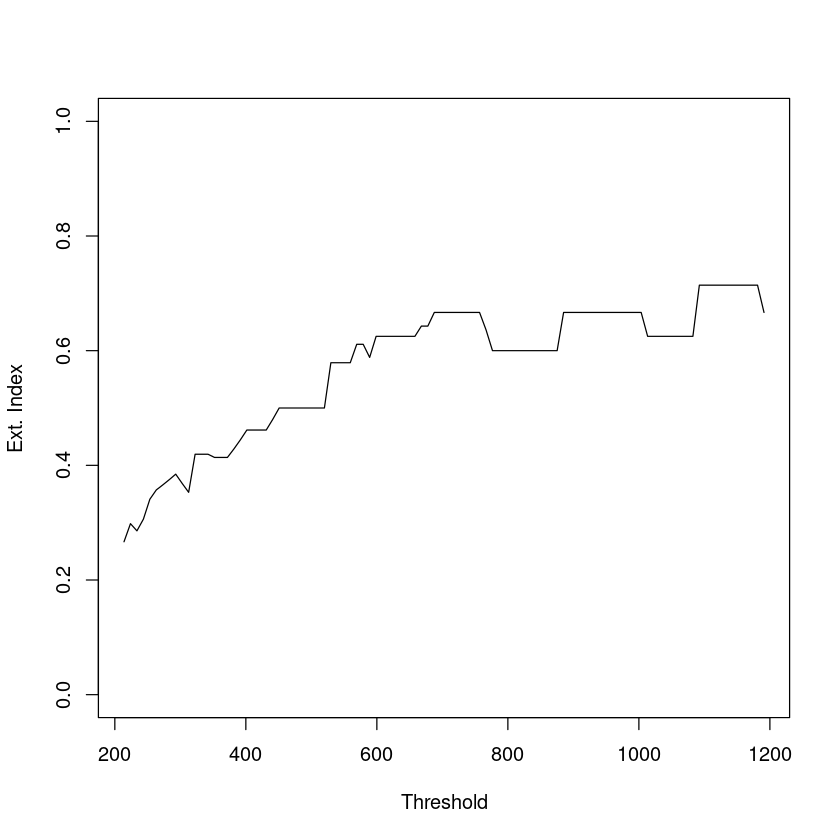

Saving 7 x 7 in image


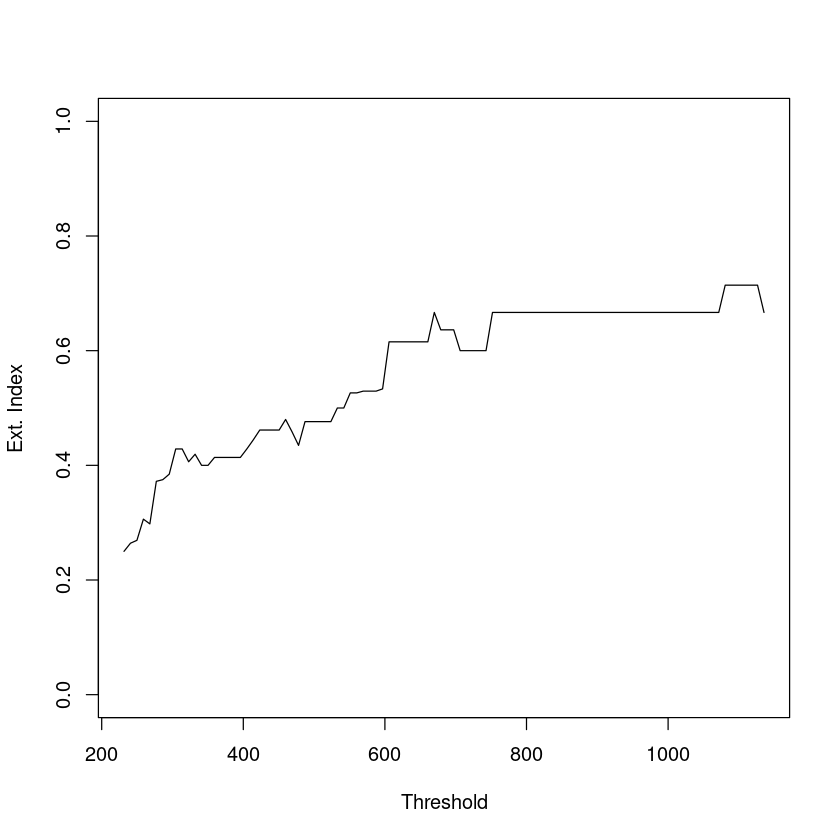

Saving 7 x 7 in image


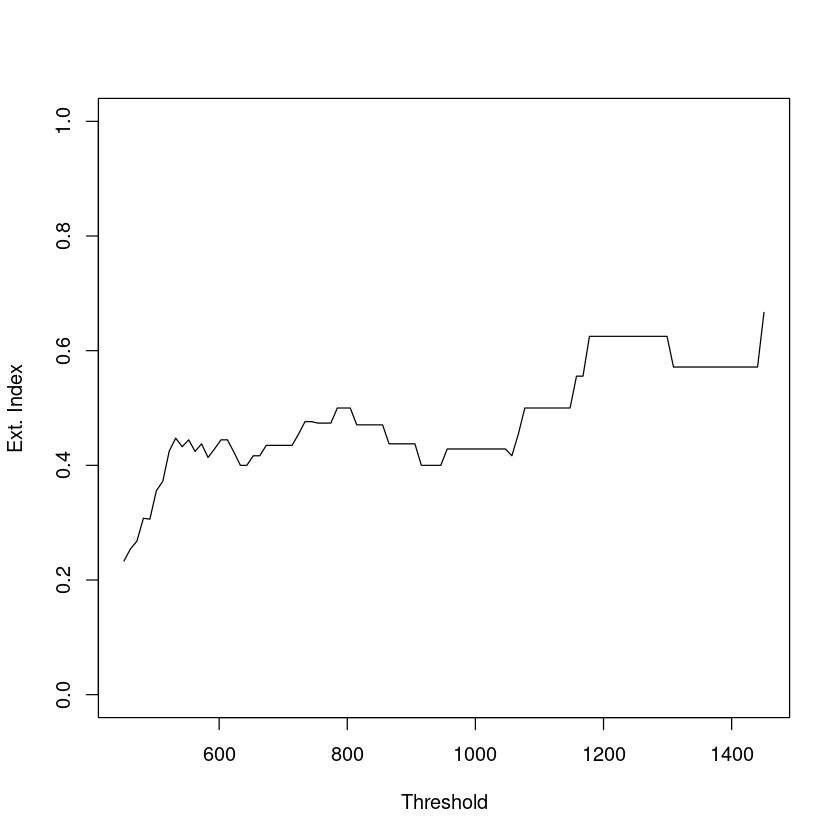

In [16]:
datmat <- as.matrix(train_summer_declustered[, 5:17])

for(i in 1:13) {
    explotdat <- evd::exiplot(
        datmat[,i], 
        tlim = quantile(probs = c(0.5, 0.95), datmat[,i])
    )
    
    plotdat <- data.frame(threshold = explotdat$x, extr_index = explotdat$y)
    p <- ggplot(aes(x = threshold, y = extr_index), data = plotdat) + 
    geom_line() + 
    ggtitle(paste("Extremal index plot for", names(train_summer_declustered[i+4]))) +
    theme_minimal()
    
    ggsave(paste0("evi_", names(train_summer_declustered)[i+4], ".png"), p)
}